In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [2]:
# Fetch stock data
start = '2000-01-01'
end = '2025-01-01'
df = yf.download('AAPL', start=start, end=end)
print(df.head())

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed

Price          Close      High       Low      Open     Volume
Ticker          AAPL      AAPL      AAPL      AAPL       AAPL
Date                                                         
2000-01-03  0.842151  0.846382  0.765036  0.789017  535796800
2000-01-04  0.771149  0.832276  0.761274  0.814408  512377600
2000-01-05  0.782433  0.831806  0.774910  0.780552  778321600
2000-01-06  0.714723  0.805004  0.714723  0.798421  767972800
2000-01-07  0.748578  0.759863  0.718485  0.726008  460734400


In [3]:
df.tail()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2024-12-24,257.916443,257.926411,255.009620,255.209412,23234700
2024-12-26,258.735504,259.814335,257.347047,257.906429,27237100
2024-12-27,255.309296,258.415896,252.782075,257.546826,42355300
2024-12-30,251.923019,253.221595,250.474615,251.952985,35557500
2024-12-31,250.144974,253.001833,249.156056,252.162760,39480700


In [7]:
df= df.reset_index()
df.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
0,2000-01-03,0.842151,0.846382,0.765036,0.789017,535796800
1,2000-01-04,0.771149,0.832276,0.761274,0.814408,512377600
2,2000-01-05,0.782433,0.831806,0.774910,0.780552,778321600
3,2000-01-06,0.714723,0.805004,0.714723,0.798421,767972800
4,2000-01-07,0.748578,0.759863,0.718485,0.726008,460734400


In [9]:
df.tail()

Price,Date,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
6284,2024-12-24,257.916443,257.926411,255.009620,255.209412,23234700
6285,2024-12-26,258.735504,259.814335,257.347047,257.906429,27237100
6286,2024-12-27,255.309296,258.415896,252.782075,257.546826,42355300
6287,2024-12-30,251.923019,253.221595,250.474615,251.952985,35557500
6288,2024-12-31,250.144974,253.001833,249.156056,252.162760,39480700


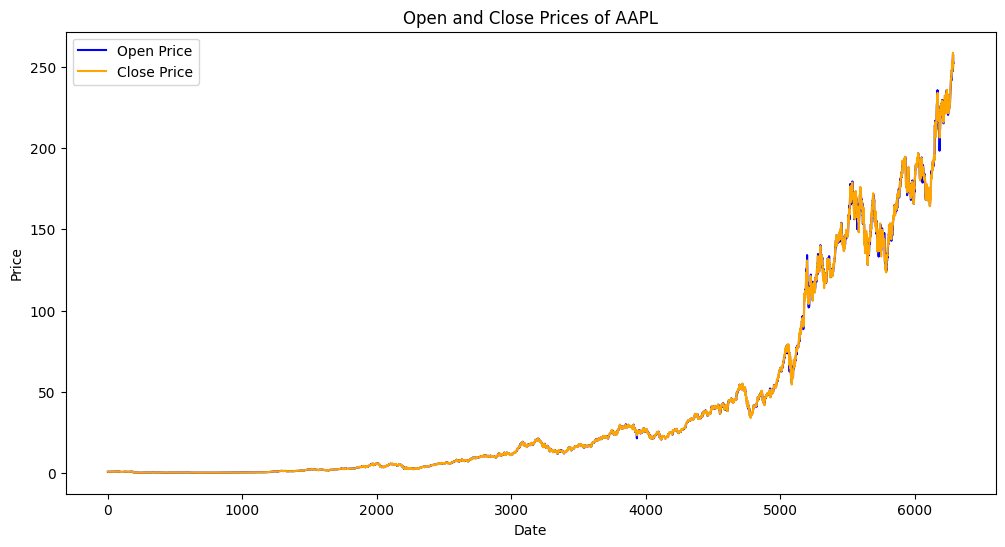

In [11]:
# Plotting the Open and Close prices
plt.figure(figsize=(12,6))
plt.plot(df['Open'], label='Open Price', color='blue')
plt.plot(df['Close'], label='Close Price', color='orange')
plt.title('Open and Close Prices of AAPL')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

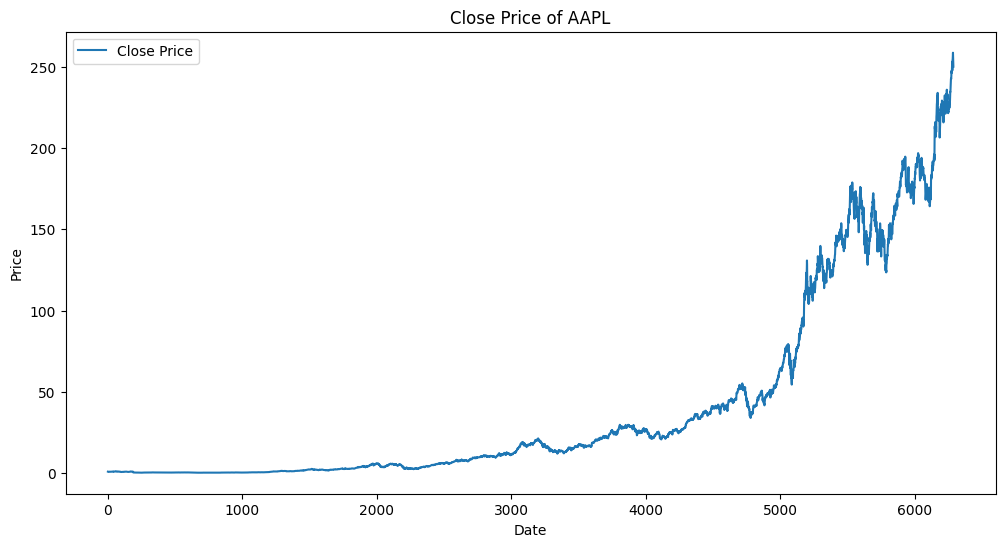

In [13]:
# Plotting the Close price
plt.figure(figsize=(12,6))
plt.plot(df['Close'], label='Close Price')
plt.title('Close Price of AAPL')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [15]:
# Calculating moving averages
ma100 = df['Close'].rolling(100).mean()
ma200 = df['Close'].rolling(200).mean()

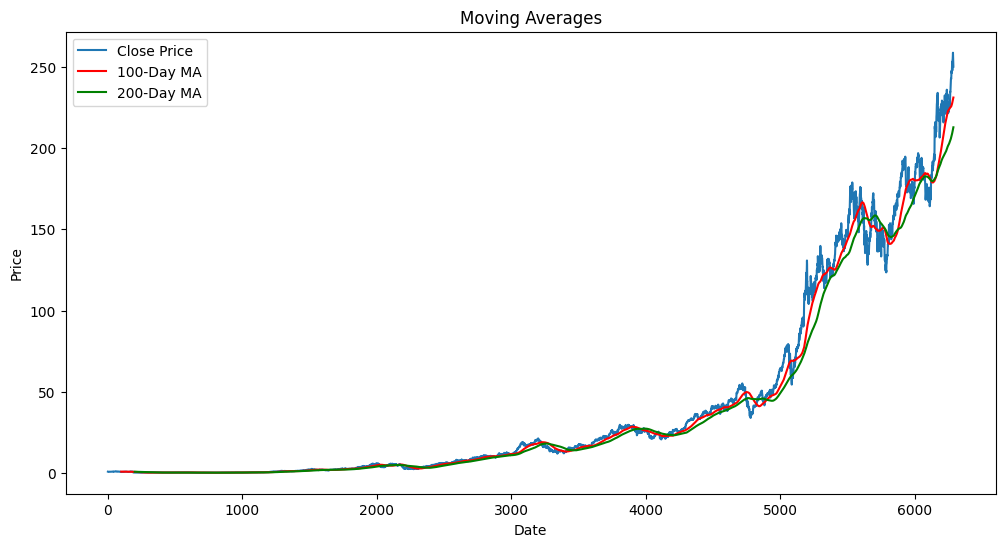

In [17]:
# Plotting moving averages
plt.figure(figsize=(12,6))
plt.plot(df['Close'], label='Close Price')
plt.plot(ma100, 'r', label='100-Day MA')
plt.plot(ma200, 'g', label='200-Day MA')
plt.title('Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [19]:
# Splitting Data into Training and Testing
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])
print(f'Training Data Shape: {data_training.shape}')
print(f'Testing Data Shape: {data_testing.shape}')

Training Data Shape: (4402, 1)
Testing Data Shape: (1887, 1)


In [21]:
# Preprocessing the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_training_array = scaler.fit_transform(data_training)

In [23]:
# Creating the training dataset
x_train = []
y_train = []
for i in range(100, data_training_array.shape[0]): 
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [25]:
# Building the Sequential model
model = Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(units=120, activation='relu', return_sequences=False))
model.add(Dropout(0.5))
model.add(Dense(units=1))

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [27]:
# Model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [37]:
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=50, validation_split=0.2)

Epoch 1/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 14s 115ms/step - accuracy: 3.8593e-04 - loss: 7.6553e-04 - val_accuracy: 0.0012 - val_loss: 0.0029
Epoch 2/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 13s 117ms/step - accuracy: 1.1434e-04 - loss: 7.5902e-04 - val_accuracy: 0.0012 - val_loss: 0.0100
Epoch 3/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 14s 127ms/step - accuracy: 2.7820e-04 - loss: 8.5533e-04 - val_accuracy: 0.0012 - val_loss: 0.0094
Epoch 4/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 13s 123ms/step - accuracy: 2.8520e-04 - loss: 6.7553e-04 - val_accuracy: 0.0012 - val_loss: 0.0134
Epoch 5/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 14s 125ms/step - accuracy: 2.1080e-04 - loss: 5.6156e-04 - val_accuracy: 0.0012 - val_loss: 0.0061
Epoch 6/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 14s 125ms/step - accuracy: 4.8417e-05 - loss: 6.5575e-04 - val_accuracy: 0.0012 - val_loss: 0.0189
Epoch 7/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 13s 123ms/step - accuracy: 7.0079e-04 - loss: 6.9301e-04 - val_accuracy: 0.0012 - val_loss: 0.0086
Epoch 8/50
108/108 ━━━━━━━━

In [43]:
# Save the model
model.save('main_trained_model.keras')

In [45]:
# Testing the model
data_testing.head()

Ticker,AAPL
4402,33.469223
4403,33.606823
4404,33.289642
4405,33.627827
4406,33.833084


In [47]:
# Testing the model
data_testing.tail()

Ticker,AAPL
6284,257.916443
6285,258.735504
6286,255.309296
6287,251.923019
6288,250.144974


In [49]:
# Preparing the final dataset for testing
past_100_days = data_training.tail(100)
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

input_data = scaler.fit_transform(final_df)

In [51]:
# Creating the testing dataset
x_test = []
y_test = []
for i in range(100, input_data.shape[0]): 
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i, 0])

x_test = np.array(x_test)

In [53]:
# Making predictions
y_predicted = model.predict(x_test)

59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step


In [55]:
# Inverse scaling the predictions
scale_factor = 1 / scaler.scale_[0]  # The scale factor for inverse transformation
y_predicted = y_predicted * scale_factor
y_test = np.array(y_test) * scale_factor

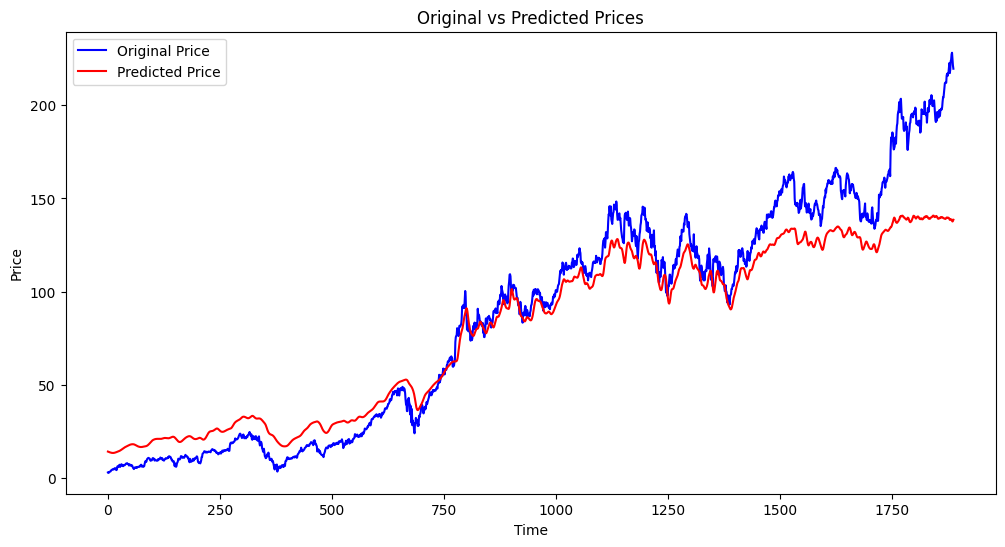

In [57]:
# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Original Price', color='blue')
plt.plot(y_predicted, label='Predicted Price', color='red')
plt.title('Original vs Predicted Prices')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()